In [1]:
!pip install diffusers transformers accelerate

In [1]:
from diffusers import AutoPipelineForText2Image, DEISMultistepScheduler
import torch


/opt/conda/envs/torch_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = AutoPipelineForText2Image.from_pretrained('lykon/dreamshaper-8', torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DEISMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Loading pipeline components...:  71%|█████████████████████████████████████████████████████████████████████████████████████████▎                                   | 5/7 [00:01<00:00,  4.43it/s]/opt/conda/envs/torch_env/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.14it/s]


In [6]:
#prompt = "portrait photo of an strawberry tree in a garden, light bokeh, intricate, steel metal, elegant, sharp focus, soft lighting, vibrant colors"
prompt = "high resolution image of a boy running in a desert, light bokeh, intricate, steel metal, elegant, sharp focus, soft lighting, vibrant colors"

generator = torch.manual_seed(30)
image = pipe(prompt, generator=generator, num_inference_steps=25).images[0]  
image.save("./sd-image.png")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 20.33it/s]


In [4]:
from PIL import Image
from IPython.display import display

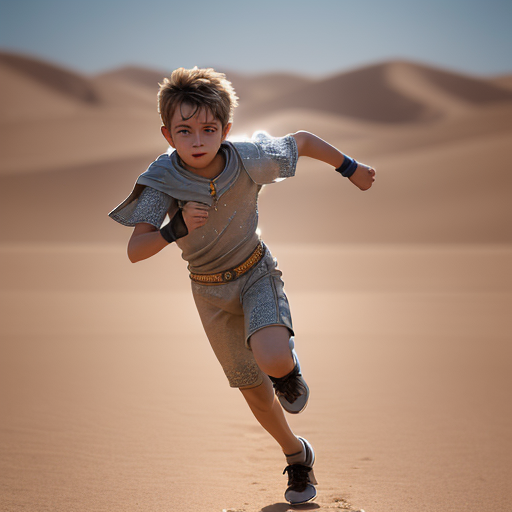

In [7]:
img = Image.open('./sd-image.png')
display(img)